In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [23]:
dataset = 'keypoint.csv'
# model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

In [30]:
NUM_CLASSES = 7

In [31]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [32]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [35]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,147 (4.48 KB)

 Trainable params: 1,147 (4.48 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# # モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 12s 447ms/step - accuracy: 0.1797 - loss: 1.7466
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1998 - loss: 1.6858 - val_accuracy: 0.2690 - val_loss: 1.5220
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3125 - loss: 1.5175
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.3118 - loss: 1.4949 - val_accuracy: 0.3361 - val_loss: 1.3889
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3438 - loss: 1.4086
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.3677 - loss: 1.3870 - val_accuracy: 0.4186 - val_loss: 1.2885
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3359 - loss: 1.3656
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [12]:

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - accuracy: 0.9536 - loss: 0.2173


In [13]:

model = tf.keras.models.load_model(model_save_path)

In [14]:

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[9.86228585e-01 1.33255692e-02 1.45469685e-05 2.04930785e-07
 4.31170483e-04]
0


In [15]:
# !pip install seaborn

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step


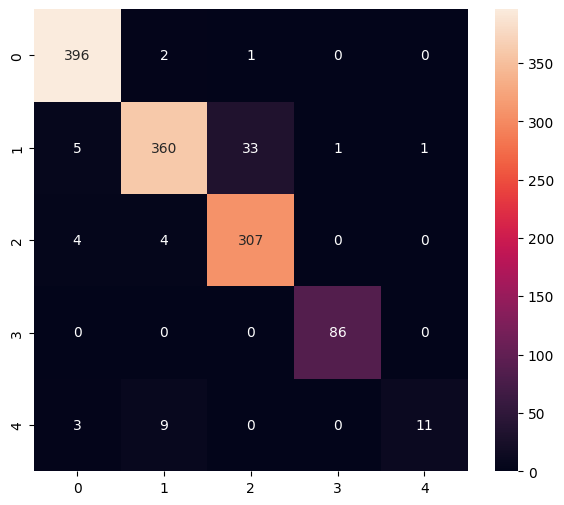

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       399
           1       0.96      0.90      0.93       400
           2       0.90      0.97      0.94       315
           3       0.99      1.00      0.99        86
           4       0.92      0.48      0.63        23

    accuracy                           0.95      1223
   macro avg       0.95      0.87      0.89      1223
weighted avg       0.95      0.95      0.95      1223



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [17]:

# model.save(model_save_path, include_optimizer=False)
# Remove optimizer weights from the model
model.optimizer = None

# Save the model without optimizer weights
model.save(model_save_path)

In [18]:



converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()


tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/03/zyq466jn3b9drbf_qlt__dh40000gn/T/tmprdpm9gol/assets


INFO:tensorflow:Assets written to: /var/folders/03/zyq466jn3b9drbf_qlt__dh40000gn/T/tmprdpm9gol/assets


: 

: 

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

NameError: name 'tflite_save_path' is not defined

In [ ]:

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.7729778  0.16973573 0.05728643]
0
